In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
data = pd.read_csv("dataframe_.csv")
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
input,1696.0,1.159933,79.005970,-134.962839,-63.386506,10.195194,70.264109,134.605775
output,1696.0,-34.088017,65.771112,-132.422167,-80.026767,-50.470981,-11.000000,134.425495


In [73]:
# shape of data
data.shape

(1697, 2)

In [74]:
# checking for null values
data.isnull().sum()

input     1
output    1
dtype: int64

Since there are only two null values we can drop these

In [75]:
data.dropna(inplace=True)
data.shape # shape of data after dropping

(1696, 2)

<AxesSubplot:>

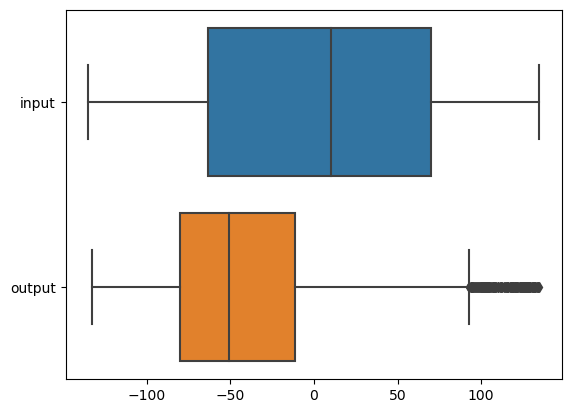

In [76]:
# Checking for Outliers
sns.boxplot(data=data, orient='h')

Some outliers are present in the target variable

In [80]:
# Count of number of outliers using IQR method
def count_outliers(data: pd.DataFrame) -> None:
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1

        ll = q1 - 1.5*iqr # lower limit
        ul = q3 + 1.5*iqr # upper limit
        
        cnt = len(data.loc[ (data[col] < ll) | (data[col] > ul), col])
        print(col, ": ", cnt)
count_outliers(data)

input :  0
output :  144


We have 144 outliers in output variable
We can either drop these outliers as 144 is quite low compared to the total data we have or we can replace these with the mean or median of data

In [81]:
# data after dropping outliers
# IQR method

data_dropped = data.copy()
col = "output"
q1 = data_dropped[col].quantile(0.25)
q3 = data_dropped[col].quantile(0.75)
iqr = q3 - q1

ll = q1 - 1.5*iqr # lower limit
ul = q3 + 1.5*iqr # upper limit

data_dropped = data_dropped.loc[ (data_dropped[col] >= ll) & (data_dropped[col] <= ul)]
data_dropped.shape

(1552, 2)

In [91]:
# data after replacing outliers with median
data_median = data.copy()
col = "output"
q1 = data_median[col].quantile(0.25)
q3 = data_median[col].quantile(0.75)
iqr = q3 - q1

ll = q1 - 1.5*iqr # lower limit
ul = q3 + 1.5*iqr # upper limit
data_median.loc[ (data_median[col] < ll) | (data_median[col] > ul), col] = data[col].median()
data_median.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [92]:
# data after replacing outliers with mean
data_mean = data.copy()
col = "output"
q1 = data_mean[col].quantile(0.25)
q3 = data_mean[col].quantile(0.75)
iqr = q3 - q1

ll = q1 - 1.5*iqr # lower limit
ul = q3 + 1.5*iqr # upper limit

data_mean.loc[ (data_mean[col] < ll) | (data_mean[col] > ul), col] = data_mean[col].mean()
data_mean.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


Text(0.5, 1.0, 'Data after replacing with mean')

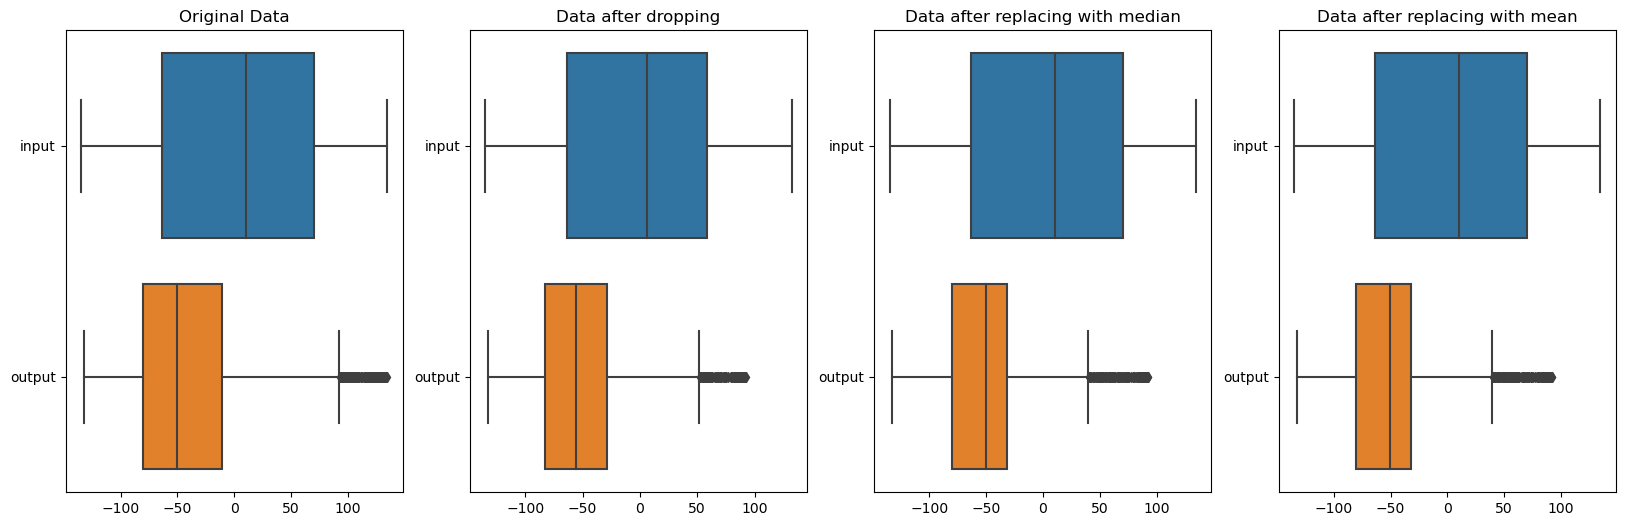

In [107]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
sns.boxplot(data=data, orient='h', ax=ax[0])
sns.boxplot(data=data_dropped, orient='h', ax=ax[1])
sns.boxplot(data=data_median, orient='h', ax=ax[2])
sns.boxplot(data=data_mean, orient='h', ax=ax[3])

ax[0].set_title("Original Data")
ax[1].set_title("Data after dropping")
ax[2].set_title("Data after replacing with median")
ax[3].set_title("Data after replacing with mean")

In [94]:
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
